In [1]:
!pip install mlrose-hiive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.8 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=005b0bff296b750749e36bef6b324dce945cbb13f726d25c25d2f3d7d786223f
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [2]:
#import libraries
import pandas as pd
import numpy as np
import time
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt

In [3]:
#setup fitness function
vectorsizes = [10, 20, 40, 60, 80, 100]
repeats = 10

In [4]:
# RHC - Iterate through vector size
RHC_mean_time = []
RHC_mean_iterations = []
RHC_mean_fitness = []
RHC_std_time = []
RHC_std_iterations = []
RHC_std_fitness = []

# itereate through different space sizes
for size in range(len(vectorsizes)):
  RHC_time = []
  RHC_iterations = []
  RHC_best_fitness = []
  for reps in range(repeats):
    weights = np.random.randint(low = 1, high = 11, size = vectorsizes[size])
    values = np.random.randint(low = 1, high = 11, size = vectorsizes[size])
    KS_fitness = mlrose.Knapsack(weights, values, max_weight_pct=.5)
    problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = KS_fitness)
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = 1000, restarts = 10, curve = True, random_state = 1)
    toc = time.perf_counter()
    RHC_time.append(toc-tic)
    RHC_iterations.append(len(history))
    RHC_best_fitness.append(best_fitness)
    
  RHC_mean_time.append(np.mean(RHC_time))
  RHC_mean_iterations.append(np.mean(RHC_iterations))
  RHC_mean_fitness.append(np.mean(RHC_best_fitness))
  RHC_std_time.append(np.std(RHC_time))
  RHC_std_iterations.append(np.std(RHC_iterations))
  RHC_std_fitness.append(np.std(RHC_best_fitness))

  print('************************ vector size: ', vectorsizes[size])
  print('time (mean, std): (',RHC_mean_time[size], '   ', RHC_std_time[size], ')')
  print('iterations (mean, std): (',RHC_mean_iterations[size], '   ', RHC_std_iterations[size], ')')
  print('best fitness (mean, std): (',RHC_mean_fitness[size], '   ', RHC_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 0.040581399399997053     0.012133422795663753 )
iterations (mean, std): ( 114.4     7.592101158440923 )
best fitness (mean, std): ( 39.4     6.151422599691879 )
************************ vector size:  20
time (mean, std): ( 0.08017122410000752     0.006272958991151815 )
iterations (mean, std): ( 126.9     11.370576062803503 )
best fitness (mean, std): ( 66.0     7.720103626247513 )
************************ vector size:  40
time (mean, std): ( 0.08345340959999703     0.017982531008594933 )
iterations (mean, std): ( 131.2     20.570853166555832 )
best fitness (mean, std): ( 137.8     14.119490075778232 )
************************ vector size:  60
time (mean, std): ( 0.0768306134999989     0.019255246320866188 )
iterations (mean, std): ( 127.2     9.927738916792686 )
best fitness (mean, std): ( 203.7     16.438065579623412 )
************************ vector size:  80
time (mean, std): ( 0.07651741630000686     0.028182653583558735

In [5]:
# SA - Iterate through vector size, random initial state vectors

SA_mean_time = []
SA_mean_iterations = []
SA_mean_fitness = []
SA_std_time = []
SA_std_iterations = []
SA_std_fitness = []
SA_schedule = mlrose.GeomDecay(init_temp=15, decay=0.85, min_temp=.01)

# itereate through different space sizes
for size in range(len(vectorsizes)):
  SA_time = []
  SA_iterations = []
  SA_best_fitness = []
  for reps in range(repeats):
    weights = np.random.randint(low = 1, high = 11, size = vectorsizes[size])
    values = np.random.randint(low = 1, high = 11, size = vectorsizes[size])
    KS_fitness = mlrose.Knapsack(weights, values, max_weight_pct=.5)
    problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = KS_fitness)
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.simulated_annealing(problem, schedule = SA_schedule, max_attempts = 100, max_iters = 1000, curve = True)
    toc = time.perf_counter()
    SA_time.append(toc-tic)
    SA_iterations.append(len(history))
    SA_best_fitness.append(best_fitness)

  SA_mean_time.append(np.mean(SA_time))
  SA_mean_iterations.append(np.mean(SA_iterations))
  SA_mean_fitness.append(np.mean(SA_best_fitness))
  SA_std_time.append(np.std(SA_time))
  SA_std_iterations.append(np.std(SA_iterations))
  SA_std_fitness.append(np.std(SA_best_fitness))

  print('************************ vector size: ', vectorsizes[size])
  print('time (mean, std): (',SA_mean_time[size], '   ', SA_std_time[size], ')')
  print('iterations (mean, std): (',SA_mean_iterations[size], '   ', SA_std_iterations[size], ')')
  print('best fitness (mean, std): (',SA_mean_fitness[size], '   ', SA_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 0.009996562599999948     0.002941783268042484 )
iterations (mean, std): ( 116.2     11.52215257666726 )
best fitness (mean, std): ( 36.2     9.008884503644166 )
************************ vector size:  20
time (mean, std): ( 0.0099739024999991     0.0024152640758084 )
iterations (mean, std): ( 134.0     29.499152530199915 )
best fitness (mean, std): ( 62.0     8.414273587185052 )
************************ vector size:  40
time (mean, std): ( 0.010107045400002335     0.0012082469361480112 )
iterations (mean, std): ( 118.4     5.083306010855534 )
best fitness (mean, std): ( 118.8     13.998571355677692 )
************************ vector size:  60
time (mean, std): ( 0.011248740600004225     0.0020497947028274275 )
iterations (mean, std): ( 134.2     15.67035417595914 )
best fitness (mean, std): ( 177.2     15.72768260107 )
************************ vector size:  80
time (mean, std): ( 0.013357899700000075     0.0028659157249787907 

In [6]:
# GA - Iterate through vector size, random initial state vectors

GA_mean_time = []
GA_mean_iterations = []
GA_mean_fitness = []
GA_std_time = []
GA_std_iterations = []
GA_std_fitness = []

# itereate through different space sizes
for size in range(len(vectorsizes)):
  GA_time = []
  GA_iterations = []
  GA_best_fitness = []
  for reps in range(repeats):
    weights = np.random.randint(low = 1, high = 11, size = vectorsizes[size])
    values = np.random.randint(low = 1, high = 11, size = vectorsizes[size])
    KS_fitness = mlrose.Knapsack(weights, values, max_weight_pct=.5)
    problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = KS_fitness)
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.genetic_alg(problem, pop_size = vectorsizes[size], mutation_prob=0.2, max_attempts = 100, max_iters = 1000, curve = True, random_state = size+reps+1)
    toc = time.perf_counter()
    GA_time.append(toc-tic)
    GA_iterations.append(len(history))
    GA_best_fitness.append(best_fitness)

  GA_mean_time.append(np.mean(GA_time))
  GA_mean_iterations.append(np.mean(GA_iterations))
  GA_mean_fitness.append(np.mean(GA_best_fitness))
  GA_std_time.append(np.std(GA_time))
  GA_std_iterations.append(np.std(GA_iterations))
  GA_std_fitness.append(np.std(GA_best_fitness))

  print('************************ vector size: ', vectorsizes[size])
  print('time (mean, std): (',GA_mean_time[size], '   ', GA_std_time[size], ')')
  print('iterations (mean, std): (',GA_mean_iterations[size], '   ', GA_std_iterations[size], ')')
  print('best fitness (mean, std): (',GA_mean_fitness[size], '   ', GA_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 0.11245293320000371     0.02671535687621169 )
iterations (mean, std): ( 136.3     31.808961001579412 )
best fitness (mean, std): ( 41.4     5.370288632839021 )
************************ vector size:  20
time (mean, std): ( 0.25858661149999307     0.053869990623178834 )
iterations (mean, std): ( 155.6     27.90412155936825 )
best fitness (mean, std): ( 76.4     7.774316690230723 )
************************ vector size:  40
time (mean, std): ( 1.680399624600014     1.0820059580453005 )
iterations (mean, std): ( 208.2     60.46784269345153 )
best fitness (mean, std): ( 170.3     12.907749610214786 )
************************ vector size:  60
time (mean, std): ( 1.1612621705000095     0.7045075983729807 )
iterations (mean, std): ( 165.9     28.331784271379732 )
best fitness (mean, std): ( 247.9     13.678084661238211 )
************************ vector size:  80
time (mean, std): ( 1.8335708675999967     0.7306684922824481 )
iteratio

In [8]:
# MIMIC - Iterate through vector size, random initial state vectors

MIMIC_mean_time = []
MIMIC_mean_iterations = []
MIMIC_mean_fitness = []
MIMIC_std_time = []
MIMIC_std_iterations = []
MIMIC_std_fitness = []
MIMIC_vectorsizes = [10, 20, 40, 80]  # use smaller vectors to save time

# itereate through different space sizes
for size in range(len(MIMIC_vectorsizes)):
  MIMIC_time = []
  MIMIC_iterations = []
  MIMIC_best_fitness = []
  for reps in range(3):  # use 3 to save time
    weights = np.random.randint(low = 1, high = 11, size = MIMIC_vectorsizes[size])
    values = np.random.randint(low = 1, high = 11, size = MIMIC_vectorsizes[size])
    KS_fitness = mlrose.Knapsack(weights, values, max_weight_pct=.5)
    problem = mlrose.DiscreteOpt(length = MIMIC_vectorsizes[size], fitness_fn = KS_fitness)
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.mimic(problem, pop_size = MIMIC_vectorsizes[size], keep_pct=0.2, max_attempts = 100, max_iters = 1000, curve = True, random_state = size+reps+1)
    toc = time.perf_counter()
    MIMIC_time.append(toc-tic)
    MIMIC_iterations.append(len(history))
    MIMIC_best_fitness.append(best_fitness)

  MIMIC_mean_time.append(np.mean(MIMIC_time))
  MIMIC_mean_iterations.append(np.mean(MIMIC_iterations))
  MIMIC_mean_fitness.append(np.mean(MIMIC_best_fitness))
  MIMIC_std_time.append(np.std(MIMIC_time))
  MIMIC_std_iterations.append(np.std(MIMIC_iterations))
  MIMIC_std_fitness.append(np.std(MIMIC_best_fitness))

  print('************************ vector size: ', MIMIC_vectorsizes[size])
  print('time (mean, std): (', MIMIC_mean_time[size], '   ',  MIMIC_std_time[size], ')')
  print('iterations (mean, std): (', MIMIC_mean_iterations[size], '   ',  MIMIC_std_iterations[size], ')')
  print('best fitness (mean, std): (', MIMIC_mean_fitness[size], '   ',  MIMIC_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 5.709353808666644     0.9891701016045765 )
iterations (mean, std): ( 101.0     0.0 )
best fitness (mean, std): ( 29.333333333333332     8.498365855987975 )
************************ vector size:  20
time (mean, std): ( 20.603848774666705     0.6194135764666868 )
iterations (mean, std): ( 102.66666666666667     0.4714045207910317 )
best fitness (mean, std): ( 86.33333333333333     2.0548046676563256 )
************************ vector size:  40
time (mean, std): ( 76.74317303466667     0.9507805628522465 )
iterations (mean, std): ( 104.33333333333333     0.4714045207910317 )
best fitness (mean, std): ( 143.33333333333334     2.8674417556808756 )
************************ vector size:  80
time (mean, std): ( 325.0108172993332     3.65176894059913 )
iterations (mean, std): ( 111.33333333333333     0.9428090415820634 )
best fitness (mean, std): ( 334.6666666666667     8.9566858950296 )


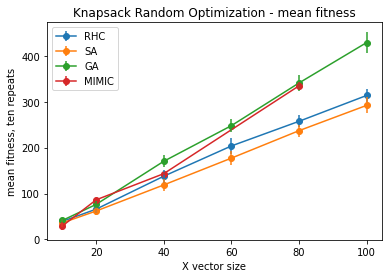

In [31]:
#plot results - fitness
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_fitness, yerr=RHC_std_fitness, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_fitness, yerr=SA_std_fitness, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_fitness, yerr=GA_std_fitness, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_fitness, yerr=MIMIC_std_fitness, barsabove=True, fmt='-o', label='MIMIC')
plt.title('Knapsack Random Optimization - mean fitness')
plt.ylabel('mean fitness, ten repeats')
plt.xlabel('X vector size')
plt.legend()
plt.show()

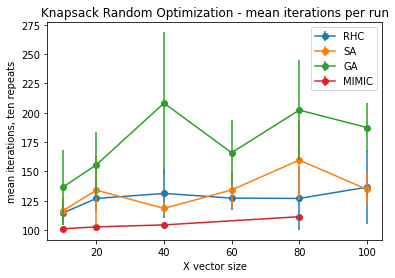

In [32]:
#plot results - iterations per run
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_iterations, yerr=RHC_std_iterations, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_iterations, yerr=SA_std_iterations, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_iterations, yerr=GA_std_iterations, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_iterations, yerr=MIMIC_std_iterations, barsabove=True, fmt='-o', label='MIMIC')
plt.title('Knapsack Random Optimization - mean iterations per run')
plt.ylabel('mean iterations, ten repeats')
plt.xlabel('X vector size')
plt.legend()
plt.show()

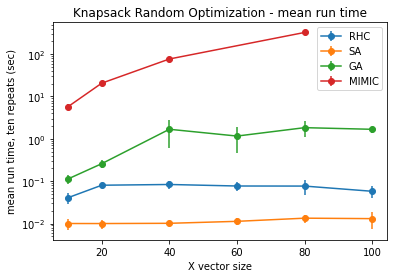

In [33]:
#plot results - run time
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_time, yerr=RHC_std_time, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_time, yerr=SA_std_time, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_time, yerr=GA_std_time, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_time, yerr=MIMIC_std_time, barsabove=True, fmt='-o', label='MIMIC')
plt.title('Knapsack Random Optimization - mean run time')
plt.ylabel('mean run time, ten repeats (sec)')
plt.yscale('log')
plt.xlabel('X vector size')
plt.legend()
plt.show()

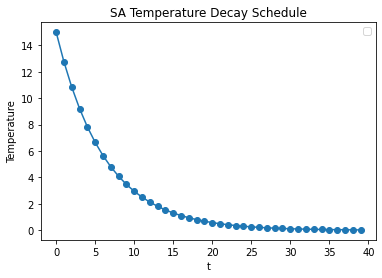

In [30]:
xx=[]
yy=[]
for i in range(40):
  xx.append(i)
  yy.append(SA_schedule.evaluate(i))

plt.errorbar(x=xx, y=yy, fmt='-o')

plt.title('SA Temperature Decay Schedule')
plt.ylabel('Temperature')
plt.xlabel('t')
plt.legend()
plt.show()